<a href="https://colab.research.google.com/github/Aarav-H/FM-Assignment/blob/main/regression-notebooks/IOCL_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install required libraries
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
warnings.filterwarnings("ignore")

NameError: name 'warnings' is not defined

In [ ]:
#Download stock prices for the security monthly data last 5 years
IOC_df = yf.download('IOC.NS',
                      start='2019-04-06',
                      end='2024-04-06',
                      progress=False,interval ='1mo'
)
IOC_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-01,105.366669,112.533333,94.333336,110.366669,76.972893,389968675
2019-06-01,111.866669,113.833336,100.533333,103.933334,72.486107,221585626
2019-07-01,103.933334,105.000000,88.000000,92.866669,64.767883,664817710
2019-08-01,91.966667,94.599998,77.500000,81.633331,56.933434,366451395
2019-09-01,81.633331,99.633331,77.500000,98.266663,69.090286,473561798


In [ ]:
#Download Market index closing prices
NIFTY_df = yf.download('^NSEI',start='2019-04-06',
                      end='2024-04-06',
                      progress=False,interval ='1mo',
)
NIFTY_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-01,11725.549805,12041.150391,11108.299805,11922.799805,11922.799805,8645600
2019-06-01,11953.750000,12103.049805,11625.099609,11788.849609,11788.849609,6788000
2019-07-01,11839.900391,11981.750000,10999.400391,11118.000000,11118.000000,9988500
2019-08-01,11060.200195,11181.450195,10637.150391,11023.250000,11023.250000,11153100
2019-09-01,10960.950195,11694.849609,10670.250000,11474.450195,11474.450195,12210000


In [ ]:
#Calculate Log returns(HPCL)
IOC_df['Return_IOC'] = np.log(IOC_df['Adj Close']/IOC_df['Adj Close'].shift(1))
print(IOC_df['Return_IOC'])

Date
2019-05-01         NaN
2019-06-01   -0.060058
2019-07-01   -0.112585
2019-08-01   -0.128927
2019-09-01    0.193531
2019-10-01   -0.004079
2019-11-01   -0.110825
2019-12-01   -0.045542
2020-01-01   -0.101342
2020-02-01   -0.070284
2020-03-01   -0.258636
2020-04-01    0.078798
2020-05-01   -0.011947
2020-06-01    0.025513
2020-07-01    0.035677
2020-08-01   -0.030418
2020-09-01   -0.149306
2020-10-01    0.073673
2020-11-01    0.061549
2020-12-01    0.072376
2021-01-01    0.024974
2021-02-01    0.050193
2021-03-01    0.009452
2021-04-01    0.019777
2021-05-01    0.184429
2021-06-01   -0.012434
2021-07-01   -0.045021
2021-08-01    0.071994
2021-09-01    0.136880
2021-10-01    0.020929
2021-11-01   -0.072936
2021-12-01   -0.028165
2022-01-01    0.115888
2022-02-01   -0.084980
2022-03-01    0.067289
2022-04-01    0.057579
2022-05-01   -0.082692
2022-06-01   -0.040687
2022-07-01   -0.017664
2022-08-01   -0.020077
2022-09-01   -0.032088
2022-10-01    0.019231
2022-11-01    0.116072
2022-1

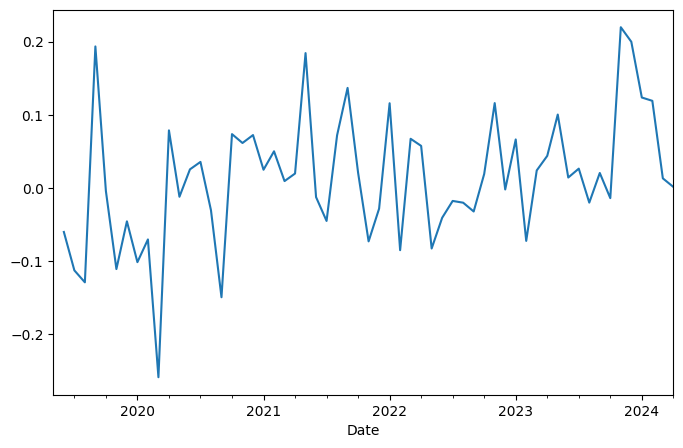

In [ ]:
IOC_df['Return_IOC'].plot(figsize=(8,5))
plt.show()

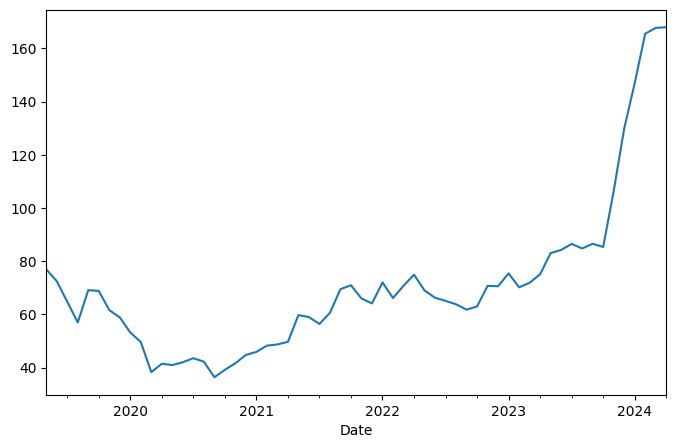

In [ ]:
IOC_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
IOC_df1 = IOC_df.dropna(axis=0)
IOC_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_IOC
Date,,,,,,,
2019-06-01,111.866669,113.833336,100.533333,103.933334,72.486107,221585626,-0.060058
2019-07-01,103.933334,105.000000,88.000000,92.866669,64.767883,664817710,-0.112585
2019-08-01,91.966667,94.599998,77.500000,81.633331,56.933434,366451395,-0.128927
2019-09-01,81.633331,99.633331,77.500000,98.266663,69.090286,473561798,0.193531
2019-10-01,99.866669,104.000000,93.366669,97.866669,68.809052,388853524,-0.004079


In [ ]:
#Caclulate log returns(NIFTY50)
NIFTY_df['Return_NIFTY'] = np.log(NIFTY_df['Adj Close']/NIFTY_df['Adj Close'].shift(1))
print(NIFTY_df['Return_NIFTY'])

Date
2019-05-01         NaN
2019-06-01   -0.011298
2019-07-01   -0.058589
2019-08-01   -0.008559
2019-09-01    0.040116
2019-10-01    0.034519
2019-11-01    0.014925
2019-12-01    0.009280
2020-01-01   -0.017103
2020-02-01   -0.065673
2020-03-01   -0.264569
2020-04-01    0.136976
2020-05-01   -0.028767
2020-06-01    0.072639
2020-07-01    0.072203
2020-08-01    0.027966
2020-09-01   -0.012366
2020-10-01    0.034503
2020-11-01    0.107904
2020-12-01    0.075195
2021-01-01   -0.025142
2021-02-01    0.063546
2021-03-01    0.011058
2021-04-01   -0.004065
2021-05-01    0.063018
2021-06-01    0.008861
2021-07-01    0.002639
2021-08-01    0.083291
2021-09-01    0.027970
2021-10-01    0.003032
2021-11-01   -0.039737
2021-12-01    0.021601
2022-01-01   -0.000819
2022-02-01   -0.031992
2022-03-01    0.039169
2022-04-01   -0.020957
2022-05-01   -0.030756
2022-06-01   -0.049712
2022-07-01    0.083720
2022-08-01    0.034430
2022-09-01   -0.038161
2022-10-01    0.052301
2022-11-01    0.040590
2022-1

In [ ]:
NIFTY_df1 = NIFTY_df.dropna(axis=0)
NIFTY_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_NIFTY
Date,,,,,,,
2019-06-01,11953.750000,12103.049805,11625.099609,11788.849609,11788.849609,6788000,-0.011298
2019-07-01,11839.900391,11981.750000,10999.400391,11118.000000,11118.000000,9988500,-0.058589
2019-08-01,11060.200195,11181.450195,10637.150391,11023.250000,11023.250000,11153100,-0.008559
2019-09-01,10960.950195,11694.849609,10670.250000,11474.450195,11474.450195,12210000,0.040116
2019-10-01,11515.400391,11945.000000,11090.150391,11877.450195,11877.450195,15461000,0.034519


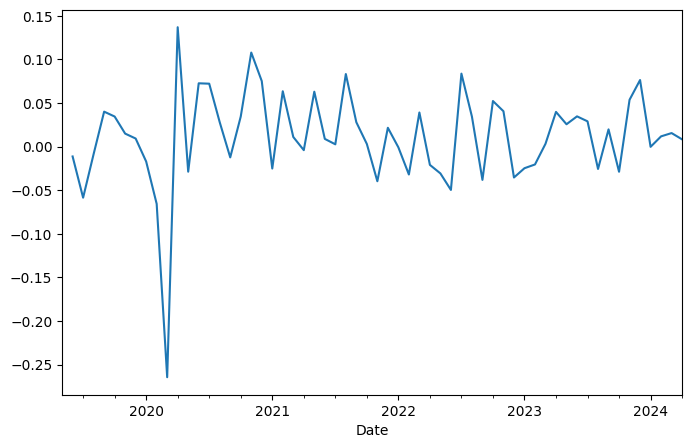

In [ ]:
NIFTY_df['Return_NIFTY'].plot(figsize=(8,5))
plt.show()

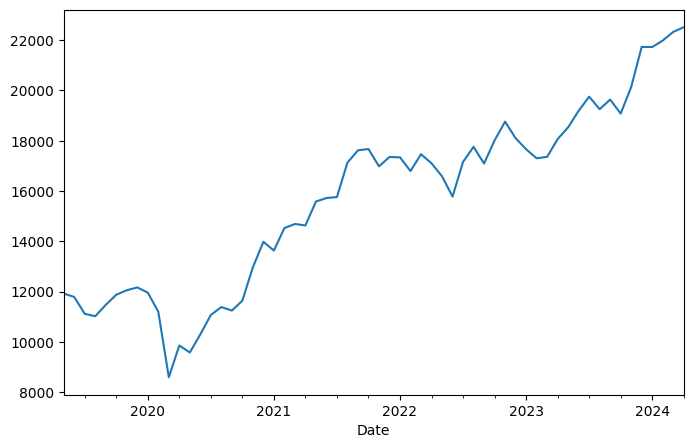

In [ ]:
NIFTY_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
IOC_df1_returns = IOC_df1['Return_IOC']
IOC_df1_returns.head()

Date
2019-06-01   -0.060058
2019-07-01   -0.112585
2019-08-01   -0.128927
2019-09-01    0.193531
2019-10-01   -0.004079
Name: Return_IOC, dtype: float64

In [ ]:
NIFTY_df1_returns = NIFTY_df1['Return_NIFTY']
NIFTY_df1_returns.head()

Date
2019-06-01   -0.011298
2019-07-01   -0.058589
2019-08-01   -0.008559
2019-09-01    0.040116
2019-10-01    0.034519
Name: Return_NIFTY, dtype: float64

In [ ]:
returns = pd.merge(NIFTY_df1_returns,IOC_df1_returns,how='inner',on='Date')
returns.head()
returns.describe()

,Return_NIFTY,Return_IOC
count,59.000000,59.000000
mean,0.010774,0.013229
std,0.055822,0.089772
min,-0.264569,-0.258636
25%,-0.020723,-0.036387
50%,0.011058,0.014341
75%,0.039495,0.066832
max,0.136976,0.219793


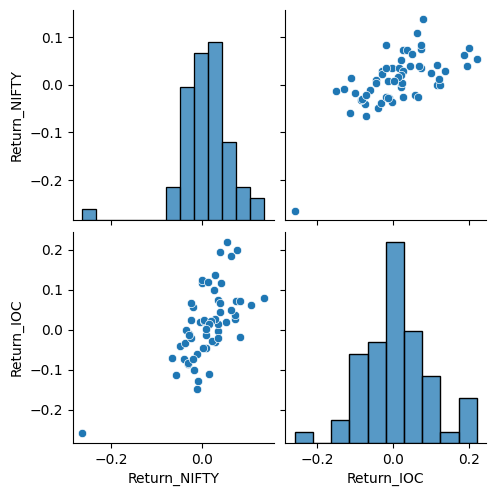

In [ ]:
sns.pairplot(returns)
plt.show()

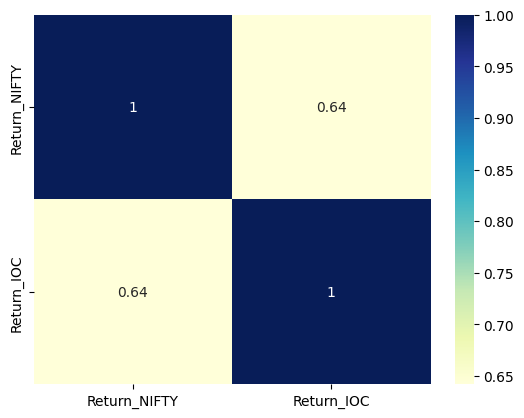

In [ ]:
sns.heatmap(returns.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
x = returns['Return_NIFTY']
y = returns['Return_IOC']
x_sm = sm.add_constant(x)

Assumptions of OLS regression
A linear relationship between the dependent and independent variables - The linear regression model is linear in parameters
The independent variables are not highly correlated with each other - no multicollinearity
The variance of the residuals is constant - no heteroskedasticity
Random sampling of observation and no autocorrelation
Assumption of Normality of Errors
Ri = αi + βi(RM) + εi.........Market model
• Ri = Return of security i

• αi = The return from the asset that is not related to the market’s return. This is “alpha” return from the security

• βi = Beta or the return from the security explained by the market index’s return

• RM = The market index’s return

• εi = Error term for past returns not explained by the regression equation

In [ ]:
#Regression - Market model
model = sm.OLS(y,x_sm)

OLS estimation or Ordinary Least square Minimizes the sum of squared errors

In [ ]:
results = model.fit()

In [ ]:
#Regression result
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Return_IOC   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     39.96
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           4.26e-08
Time:                        08:17:58   Log-Likelihood:                 74.677
No. Observations:                  59   AIC:                            -145.4
Df Residuals:                      57   BIC:                            -141.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0021      0.009      0.229      0.820      -0.016       0.021
Return_NIFTY     1.0324      0.163      6.321      0.000       0.705       1.359
==============================================================================
Omnibus:                        1.988   Durbin-Watson:                   1.694
Prob(Omnibus):                  0.370   Jarque-Bera (JB):                1.852
Skew:                           0.421   Prob(JB):                        0.396
Kurtosis:                       2.788   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Beta for IOCL stock = 1.0324 and significant at 5%

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2019-06-01 to 2024-04-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Return_NIFTY  59 non-null     float64
 1   Return_IOC    59 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


<Axes: xlabel='Return_NIFTY', ylabel='Return_IOC'>

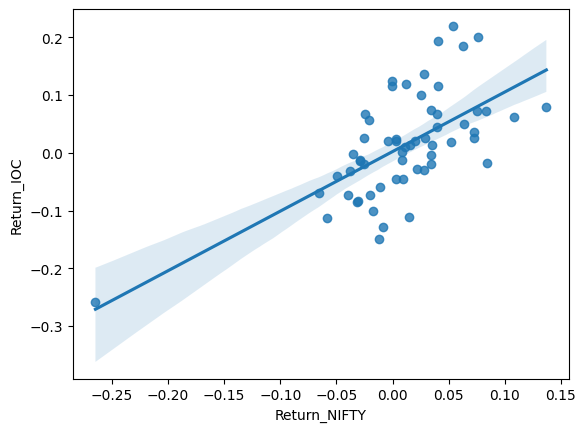

In [ ]:
#Regression - Security Characteristic line
returns.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_IOC', data = returns)

In [ ]:
print('resid', results.resid)

resid Date
2019-06-01   -0.050500
2019-07-01   -0.054203
2019-08-01   -0.122197
2019-09-01    0.150009
2019-10-01   -0.041822
2019-11-01   -0.128339
2019-12-01   -0.057229
2020-01-01   -0.085790
2020-02-01   -0.004588
2020-03-01    0.012403
2020-04-01   -0.064723
2020-05-01    0.015647
2020-06-01   -0.051586
2020-07-01   -0.040972
2020-08-01   -0.061396
2020-09-01   -0.138645
2020-10-01    0.035946
2020-11-01   -0.051959
2020-12-01   -0.007362
2021-01-01    0.048826
2021-02-01   -0.017518
2021-03-01   -0.004069
2021-04-01    0.021869
2021-05-01    0.117263
2021-06-01   -0.023688
2021-07-01   -0.049851
2021-08-01   -0.016103
2021-09-01    0.105898
2021-10-01    0.015693
2021-11-01   -0.034017
2021-12-01   -0.052572
2022-01-01    0.114627
2022-02-01   -0.054058
2022-03-01    0.024745
2022-04-01    0.077109
2022-05-01   -0.053045
2022-06-01    0.008531
2022-07-01   -0.106203
2022-08-01   -0.057729
2022-09-01    0.005205
2022-10-01   -0.036871
2022-11-01    0.072061
2022-12-01    0.032518


<ipython-input-28-a89ebdceef41>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results.resid)


count    5.900000e+01
mean     2.969611e-18
std      6.883102e-02
min     -1.386453e-01
25%     -5.177244e-02
50%     -4.939498e-03
75%      2.863162e-02
max      1.621976e-01
dtype: float64

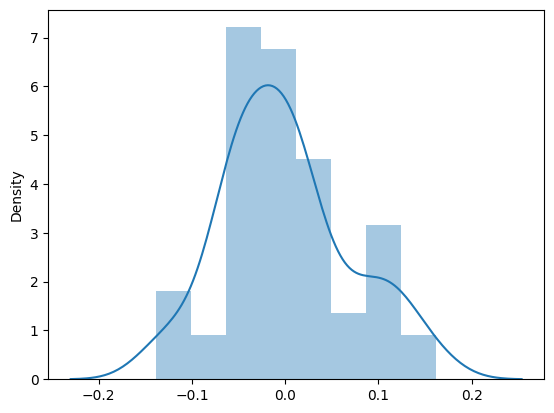

In [ ]:
#Histogram of residuals
sns.distplot(results.resid)
results.resid.describe()

In [ ]:
#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(results.resid,  results.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 1.8395340158139206, 'Test Statistic p-value': 0.39861190368771865, 'F-Statistic': 0.9010939913792794, 'F-Test p-value': 0.4119314690226509}


#The errors are homoskedastic as per the White test


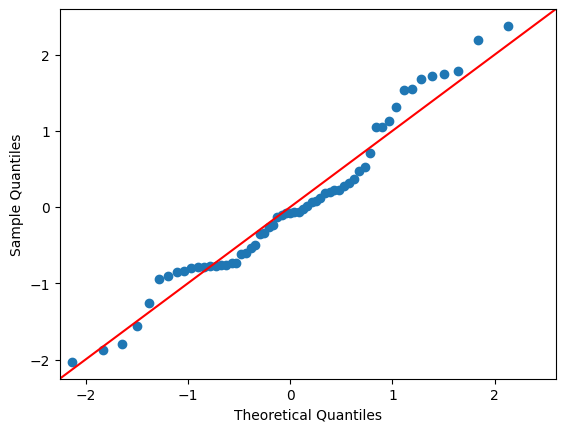

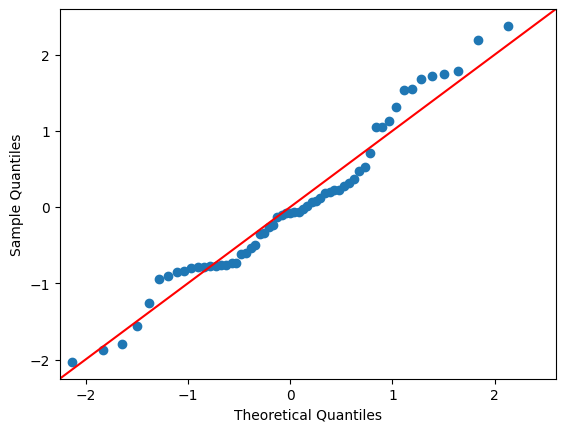

In [ ]:
#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(results.resid,line='45',fit=True,dist=stats.norm)

In [ ]:
stats.normaltest(results.resid)

NormaltestResult(statistic=1.9883825035253333, pvalue=0.37002257867393035)

We can see that since we are plotting the data with the theoretical quantiles of a normal distribution, we are getting almost a straight line, though some points are not exactly on the line. The D’Agostino’s K-squared test result suggests that the null hypothesis that the distribution is normal cannot be rejected at 1% significance level.